## Import MNIST Images - Deep Learning with PyTorch 14

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Dataset link: https://www.tensorflow.org/datasets/catalog/mnist

In [3]:
# Convert MNIST image files into Tensor of 4-Dimentions (# of images, Height, Width, Color Channel)
transform = transforms.ToTensor()

In [4]:
#Train Data
train_data = datasets.MNIST(root="cnn_data", train=True, download=True, transform=transform)

In [5]:
#Test Data
test_data = datasets.MNIST(root="cnn_data", train=False, download=True, transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

Show what directory we are currently in

In [7]:
pwd

'c:\\Learning\\Torch-Tut-Codemy.com'

Show data in the current directory

In [8]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 42B4-CB90

 Directory of c:\Learning\Torch-Tut-Codemy.com

09/21/2024  08:46 PM    <DIR>          .
09/22/2024  09:19 AM    <DIR>          ..
09/19/2024  03:18 PM    <DIR>          .idea
09/20/2024  11:37 AM            53,837 59954intro_to_CNN.jfif
09/03/2024  11:23 AM             4,551 bezdekIris.data
09/23/2024  09:35 AM            15,488 CNN.ipynb
09/21/2024  08:46 PM    <DIR>          cnn_data
09/21/2024  07:46 PM             3,680 CNN_Intro.ipynb
09/20/2024  12:00 PM            79,414 convolutional-layer.jpg
09/20/2024  11:48 AM            15,114 image.png
09/03/2024  11:23 AM               105 Index
09/03/2024  11:23 AM             4,551 iris.data
09/03/2024  11:23 AM             2,998 iris.names
09/20/2024  12:34 PM            48,869 locally_connected.png
09/20/2024  11:04 AM             3,136 my_iris_torch_model.pt
09/20/2024  11:15 AM            49,716 Part-1-SimpleNN.ipynb
09/21/2024  07:37 PM           168,629 poolin

## Convolutional and Pooling Layers - Deep Learning with PyTorch 15

In [9]:
# craete a small batch for images.....let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [10]:
# Define our CNN model
# Describe Convolutional layer and what it's doing (2 convolutional layers)
# This is just an example in the step we'll build out the actual model
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [11]:
# Grab 1 MNIST record/image
for i, (X_train, y_train) in enumerate(train_data):
    break

In [12]:
X_train.shape

torch.Size([1, 28, 28])

Above output tells that there is one image with 28 x 28 pixels

In [13]:
# Converting to a 4D batch
x = X_train.view(1,1,28,28)

In [14]:
x.shape

torch.Size([1, 1, 28, 28])

In [15]:
# Perform our first convolutional 
x = F.relu(conv1(x)) #Rectified Linear Unit for our activation function

In [16]:
# 1 single image, 6 is the filters/kernels we asked for, 26x26(Since we didn't add any padding to the conv layer it will remove some pixels from the image border)
x.shape

torch.Size([1, 6, 26, 26])

In [17]:
# Pass thru the pooling layer
x = F.max_pool2d(x, 2,2) # kernel of 2 and stride of 2

![alt text](output_after_pool_eq.png "Equation to calculate the output size after the pooling")

In [26]:
((26-2) / 2) + 1

13.0

In [18]:
x.shape # ((26-2) / 2) + 1

torch.Size([1, 6, 13, 13])

In [19]:
#Lets do our 2nd convolutional layer
x = F.relu(conv2(x))

In [20]:
x.shape

torch.Size([1, 16, 11, 11])

In [21]:
# 2nd pooling layer
x = F.max_pool2d(x, 2,2)

In [22]:
x.shape # ((11-2) / 2) + 1 = 5.5 but we have to round down, because you can't invent data to round up

torch.Size([1, 16, 5, 5])

In [23]:
# Explaining what happened to the pixels over time
((28-2)/2 - 2) / 2

5.5

## Convolutional Neural Network Model - Deep Learning with PyTorch 16

In [24]:
# Model class
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)

        #Fully connected layer
        self.fc1 = nn.Linear(5*5*16, 120) #Here the input is the shape of the output tensor which we tested for one image earlier
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10) # Here the output should be 10 because there are 10 classes in this dataset, for other input and output values we can play around(but everytime you go down the neurons should be decreased)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2,2)
        # Second Pass
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2,2)

        # Re-View to flattern it out
        X = X.view(-1, 5*5*16) #negative one so that we can vary the batch size
        
        #Fully connected layer
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        return F.log_softmax(X, dim=1)

In [25]:
# create an instance of the model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
# Loss function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # smaller the learning rate, the longer its gonna take to train 

## Train and Test CNN Model - Deep Learning with PyTorch 17

In [29]:
import time
start_time = time.time()

# create variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop of Epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    #Train
    for b,(X_train, y_train) in enumerate(train_loader):
        b+=1 # Start our batch at 1
        y_pred = model(X_train) #get predicted values from the training set. Not flattened 2D
        loss = criterion(y_pred, y_train) #how off are we? Compare the predictions with y_train

        predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point 
        batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False = 0 ,sum those up 
        trn_corr += batch_corr # keep track as we go along in training.

        #update our parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print our results
        if b%600 ==0:
            print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')
    
    train_losses.append(loss)
    train_correct.append(trn_corr)

    #Test
    with torch.no_grad(): # No gradientso we don't update weights and biases with test data
        for b,(X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1] #adding up correct predictions
            tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'trainng time took {total/60} miniutes!')

Epoch: 0 Batch: 600 Loss: 1.3900482654571533
Epoch: 0 Batch: 1200 Loss: 1.1512937545776367
Epoch: 0 Batch: 1800 Loss: 0.9217565655708313
Epoch: 0 Batch: 2400 Loss: 1.1531751155853271
Epoch: 0 Batch: 3000 Loss: 0.9219411015510559
Epoch: 0 Batch: 3600 Loss: 0.7013807892799377
Epoch: 0 Batch: 4200 Loss: 0.9213376045227051
Epoch: 0 Batch: 4800 Loss: 0.2304559201002121
Epoch: 0 Batch: 5400 Loss: 0.9210673570632935
Epoch: 0 Batch: 6000 Loss: 0.9219022989273071
Epoch: 1 Batch: 600 Loss: 0.9210359454154968
Epoch: 1 Batch: 1200 Loss: 0.9235343933105469
Epoch: 1 Batch: 1800 Loss: 1.1513195037841797
Epoch: 1 Batch: 2400 Loss: 1.3815526962280273
Epoch: 1 Batch: 3000 Loss: 0.9215022921562195
Epoch: 1 Batch: 3600 Loss: 1.1531686782836914
Epoch: 1 Batch: 4200 Loss: 1.1516876220703125
Epoch: 1 Batch: 4800 Loss: 0.9210476875305176
Epoch: 1 Batch: 5400 Loss: 0.9157994985580444
Epoch: 1 Batch: 6000 Loss: 2.879031181335449
Epoch: 2 Batch: 600 Loss: 0.9216534495353699
Epoch: 2 Batch: 1200 Loss: 0.921035587

<img src="tarining_loop_code.png" alt="training loop code" title="training loop code" width="500" height="300"/>

#### Training Loop
- Enumerate through batches: Iterates over the training data in batches using train_loader.
- Model prediction: y_pred = model(X_train) computes the predictions for the current batch of data.
- Calculate loss: The loss function (criterion) calculates how far off the model's predictions (y_pred) are from the true labels (y_train).
- Correct Predictions:
    - torch.max(y_pred.data, 1)[1] finds the predicted class labels.
    - (predicted == y_train).sum() calculates how many predictions are correct.
- Backpropagation and Optimizer Step:
    - optimizer.zero_grad() clears previous gradients.
    - loss.backward() computes gradients via backpropagation.
    - optimizer.step() updates the model's parameters.


<img src="testing_loop_code.png" alt="training loop code" title="training loop code" width="400" height="200"/>

#### Testing Loop (No Gradients)
- In the testing loop, the model evaluates the test data without calculating gradients (torch.no_grad()), meaning no updates are made to the model.
- For each batch of test data:
    - y_val = model(X_test) gets the model's predictions.
    - torch.max(y_val.data, 1)[1] finds the predicted class.
    - (predicted == y_test).sum() counts how many predictions were correct.

## Graph CNN Results - Deep Learning with PyTorch 18

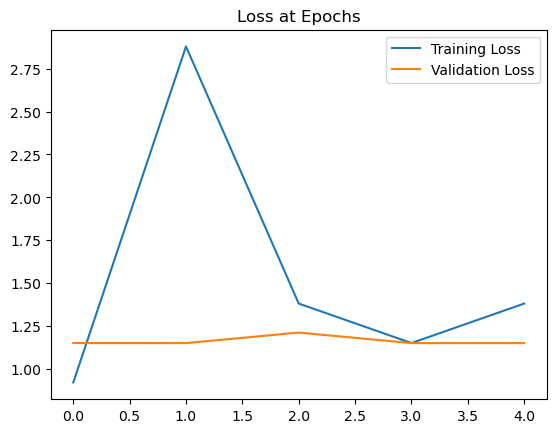

In [30]:
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epochs")
plt.legend()

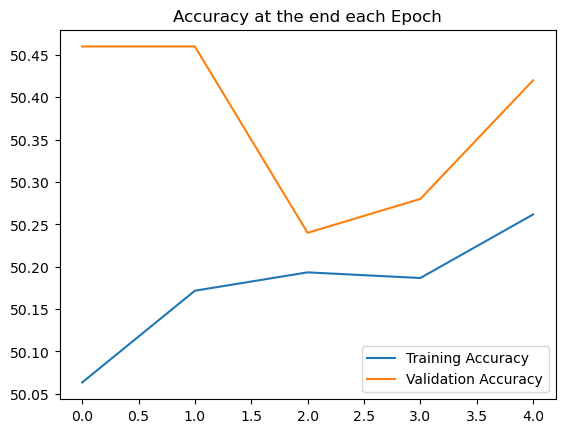

In [31]:
# graph the accuracy at the end of each epochs
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end each Epoch")
plt.legend()